In [2]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import time
#random.seed(seed = 57)
from tqdm import tqdm_notebook as tqdm
start_time = time.time()
n = 5000

In [13]:
%%time 

def getK(n):
    seen = set()
    
    while(True):
        new_num = np.random.randint(0, n)
        
        if new_num in seen:
            return len(seen)
        else:
            seen.add(new_num)
    
k = getK(n)

print("Q1A. This took {} random trials.".format(k))

Q1A. This took 72 random trials.
Wall time: 9.06 ms


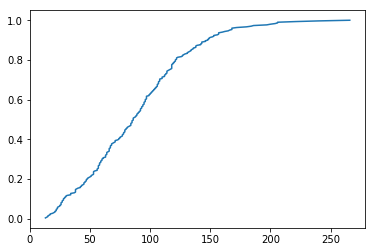

Wall time: 185 ms


In [11]:
%%time

m = 300

count = []
count_trials = []
cumulative = [0 for i in range(m)]
fraction = [0 for i in range(m)]

for i in range(m):
    k = getK(n)
    count_trials.append(k)
    count.append(1)
single_end_time = time.time()

d = {'k': count_trials, 'count': count, 
     'cumulative': cumulative, 'Fraction': fraction}
df = pd.DataFrame(data = d)
df2 = df.sort_values(by = ['k'])
#df.groupby(by = ['k'])
np_df = df2.as_matrix()
np_df = np_df.astype(float)

for ind, rows in enumerate(np_df):
    if ind != 0:
        rows[2] = rows[1] + np_df[ind-1][2]
        rows[0] = float(rows[2]) / float(m)
    else:
        rows[2] = 1
        rows[0] = float(rows[2]) / float(m)

x = np_df[:,-1] #k
y = np_df[:, 0] #Cumulative Distribution

plt.plot(x, y)
plt.show()

In [12]:
ksum = df2.sum()['k']
estimate = ksum /float(m)
    
print(
    'The expected number of k random trials in order to have a collision is {}'
      .format(estimate))

The expected number of k random trials in order to have a collision is 88.59333333333333


In [17]:
first_time = single_end_time-start_time
print("Time taken for m=400 trials is {} seconds".format(first_time))

N = [4000,10000, 20000, 50000]
i = 100000
while i < 1000000:
    N.append(i)
    i += 100000


M = [300, 1000, 2500, 5000, 10000]
def getTime(N, m):
    times = []
    for n in tqdm(N):
#         print("This process is here for n = ", n)
        start_time = time.time()
        for i in range(m):
            k = getK(n)
        time_taken = time.time() - start_time        
#         print("Time Taken: ", time_taken)
        times.append(time_taken)
    return times

delay = []
    
for m in tqdm(M):
    d1 = getTime(N,m)
    delay.append(d1)

Time taken for m=400 trials is -177.02657413482666 seconds


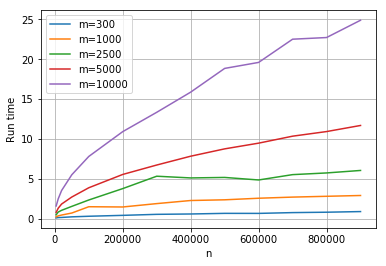

In [20]:
plt.plot(N,  delay[0], label='m={}'.format(M[0]))
plt.plot(N,  delay[1], label='m={}'.format(M[1]))
plt.plot(N,  delay[2], label='m={}'.format(M[2]))
plt.plot(N,  delay[3], label='m={}'.format(M[3]))
plt.plot(N,  delay[4], label='m={}'.format(M[4]))
plt.xticks = N
plt.legend()
plt.grid()
plt.ylabel("Run time", fontsize = 10)
plt.xlabel("n", fontsize = 10)

plt.show()